In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:

df = pd.read_csv("D:\\data.csv")  # Replace with your path if needed
print("First 5 rows:\n", df.head())
print("\nShape of data:", df.shape)

First 5 rows:
    ID  Age   Salary Department  Experience_Years Remote_Work
0   1   56  38392.0         IT               1.0         Yes
1   2   46  60535.0         IT               5.0          No
2   3   32  82256.0    Finance              12.0         Yes
3   4   25  65222.0    Finance              13.0         Yes
4   5   38  93335.0  Marketing               3.0          No

Shape of data: (100, 6)


In [3]:
# 3. Check for NULL values
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
ID                  0
Age                 0
Salary              5
Department          0
Experience_Years    5
Remote_Work         0
dtype: int64


In [4]:
# Handle missing values
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Experience_Years'] = df['Experience_Years'].fillna(df['Experience_Years'].mean())

# Check again
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 ID                  0
Age                 0
Salary              0
Department          0
Experience_Years    0
Remote_Work         0
dtype: int64


In [5]:
# 4. Data types
print("\nData types:")
print(df.dtypes)



Data types:
ID                    int64
Age                   int64
Salary              float64
Department           object
Experience_Years    float64
Remote_Work          object
dtype: object


In [6]:
# 5. Summary of values
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Descriptive statistics:
                ID         Age        Salary Department  Experience_Years  \
count   100.000000  100.000000    100.000000        100        100.000000   
unique         NaN         NaN           NaN          4               NaN   
top            NaN         NaN           NaN  Marketing               NaN   
freq           NaN         NaN           NaN         34               NaN   
mean     50.500000   37.910000  66231.515789        NaN          7.252632   
std      29.011492   12.219454  20174.659873        NaN          4.111989   
min       1.000000   18.000000  30206.000000        NaN          1.000000   
25%      25.750000   26.750000  51948.750000        NaN          3.750000   
50%      50.500000   38.000000  66231.515789        NaN          7.126316   
75%      75.250000   46.250000  82679.750000        NaN         10.000000   
max     100.000000   59.000000  99163.000000        NaN         14.000000   

       Remote_Work  
count          100  
unique  

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0
Number of outliers: 0
Number of outliers: 0
Number of outliers: 0


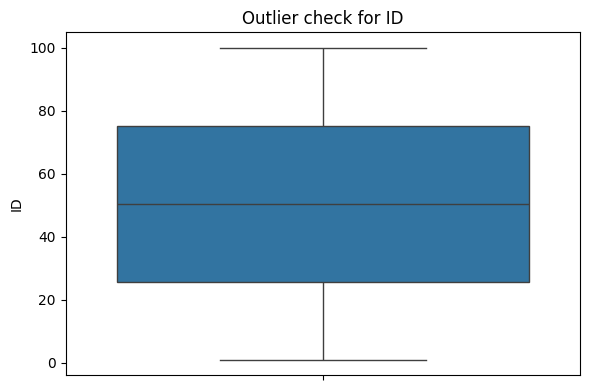

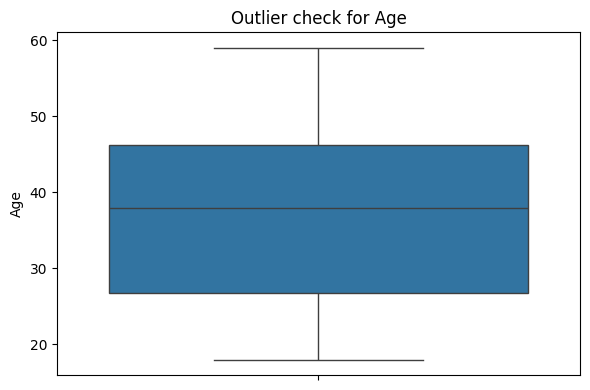

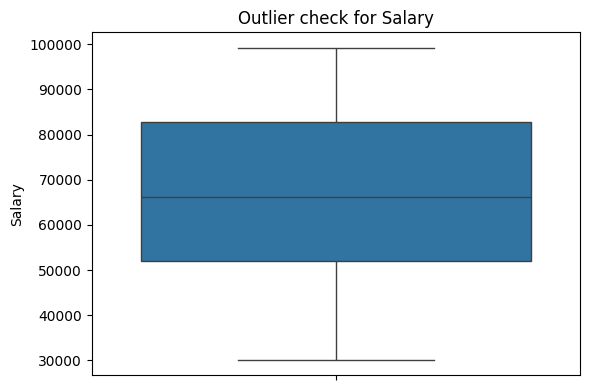

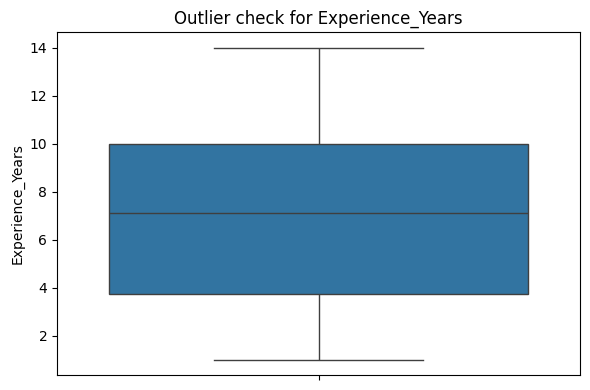

In [10]:
# 6. Detect outliers using boxplots for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Outlier check for {col}')
    plt.tight_layout()
    plt.show()


In [11]:
# 7. Normalize (MinMax Scaling) all numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nAfter MinMax Scaling:")
print(df[numeric_cols].head())



After MinMax Scaling:
         ID       Age    Salary  Experience_Years
0  0.000000  0.926829  0.118712          0.000000
1  0.010101  0.682927  0.439825          0.307692
2  0.020202  0.341463  0.754818          0.846154
3  0.030303  0.170732  0.507795          0.923077
4  0.040404  0.487805  0.915484          0.153846


In [12]:
# 5.1 Check data types
print("Original data types:\n")
print(df.dtypes)

# 5.2 Convert data types if needed
# For example: convert 'object' type to 'category' or 'datetime' where appropriate
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"Converted {col} to datetime.")
        except (ValueError, TypeError):
            df[col] = df[col].astype('category')
            print(f"Converted {col} to category.")

# Recheck types
print("\nUpdated data types:\n")
print(df.dtypes)

# 5.3 Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nData after normalization (MinMax Scaling):")
print(df[numeric_cols].head())

Original data types:

ID                  float64
Age                 float64
Salary              float64
Department           object
Experience_Years    float64
Remote_Work          object
dtype: object
Converted Department to category.
Converted Remote_Work to category.

Updated data types:

ID                   float64
Age                  float64
Salary               float64
Department          category
Experience_Years     float64
Remote_Work         category
dtype: object

Data after normalization (MinMax Scaling):
         ID       Age    Salary  Experience_Years
0  0.000000  0.926829  0.118712          0.000000
1  0.010101  0.682927  0.439825          0.307692
2  0.020202  0.341463  0.754818          0.846154
3  0.030303  0.170732  0.507795          0.923077
4  0.040404  0.487805  0.915484          0.153846


C:\Users\aakan\AppData\Local\Temp\ipykernel_14856\1233693365.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\aakan\AppData\Local\Temp\ipykernel_14856\1233693365.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [13]:
# 6.1 Encode categorical variables
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='category').columns

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"Encoded {col} as numeric.")

# View changes
print("\nData after encoding categorical variables:")
print(df.head())


Encoded Department as numeric.
Encoded Remote_Work as numeric.

Data after encoding categorical variables:
         ID       Age    Salary  Department  Experience_Years  Remote_Work
0  0.000000  0.926829  0.118712           2          0.000000            1
1  0.010101  0.682927  0.439825           2          0.307692            0
2  0.020202  0.341463  0.754818           0          0.846154            1
3  0.030303  0.170732  0.507795           0          0.923077            1
4  0.040404  0.487805  0.915484           3          0.153846            0


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_values = encoder.fit_transform(df[['Department']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Department']))

df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded)


          ID       Age    Salary  Department  Experience_Years  Remote_Work  \
0   0.000000  0.926829  0.118712           2          0.000000            1   
1   0.010101  0.682927  0.439825           2          0.307692            0   
2   0.020202  0.341463  0.754818           0          0.846154            1   
3   0.030303  0.170732  0.507795           0          0.923077            1   
4   0.040404  0.487805  0.915484           3          0.153846            0   
..       ...       ...       ...         ...               ...          ...   
95  0.959596  1.000000  0.023145           1          0.000000            1   
96  0.969697  0.926829  0.115275           2          0.230769            0   
97  0.979798  0.975610  0.568151           1          0.692308            1   
98  0.989899  0.658537  0.682280           3          0.384615            0   
99  1.000000  0.146341  0.314863           0          0.384615            0   

    Department_0  Department_1  Department_2  Depar